# Risk Analysis

In [35]:
# در همه مسائل می تواند استفاده شود. اینجا ما در مثال مدل های مولد استفاده میکنیم.
# ریسک یا همان هزینه در احتمال پیشین ضرب می شود

## Initialization


In [36]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## Data Generation

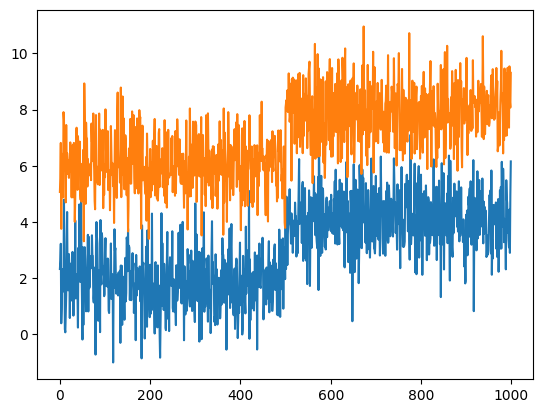

In [37]:
# دوسری داده درست می کنیم با توزیع های مختلف
# در واقعیت که ما از توزیع ورودی ها اطلاع نداریم بلکه بر اساس فیلد هدف ، داده ها را جدا کرده
# سپس برای داده ها توزیع گوسی فرض می کنیم و پارامترهای توزیع را تخمین میزنیم
N = 1000
Xtrain_1_D1 = 2 + np.random.randn(N, 1)
Xtrain_1_D2 = 6 + np.random.randn(N, 1)
ytrain_1 = np.zeros((N, 1))
Xtrain_2_D1 = 4 + np.random.randn(N, 1)
Xtrain_2_D2 = 8 + np.random.randn(N, 1)
ytrain_2 = np.ones((N, 1))
Xtrain_1 = np.hstack((Xtrain_1_D1, Xtrain_1_D2))
Xtrain_2 = np.hstack((Xtrain_2_D1, Xtrain_2_D2))

X_train = np.vstack((Xtrain_1, Xtrain_2))
y_train = np.vstack((ytrain_1, ytrain_2))

Xtest_1_D1 = 2 + np.random.randn(int(N/2), 1)
Xtest_1_D2 = 6 + np.random.randn(int(N/2), 1)
ytest_1 = np.zeros((int(N/2), 1))
Xtest_2_D1 = 4 + np.random.randn(int(N/2), 1)
Xtest_2_D2 = 8 + np.random.randn(int(N/2), 1)
ytest_2 = np.ones((int(N/2), 1))

Xtest_1 = np.hstack((Xtest_1_D1, Xtest_1_D2))
Xtest_2 = np.hstack((Xtest_2_D1, Xtest_2_D2))
X_test = np.vstack((Xtest_1, Xtest_2))
y_test = np.vstack((ytest_1, ytest_2))
# داده آموزش و تست باید متعلق به یک توزیع آماری باشند.
plt.plot(X_test)

### biased and variance of estimate


In [38]:
def mean(X):
    return sum(X)/float(len(X))

# m = np.mean(X) ----> numpy method
def stdv(X):
    avg = mean(X)
    variance = []
    for i in range(len(avg)):
        variance.append(sum([(x - avg[i])**2 for x in X[:,i]])/float(len(X[:,i]) - 1))  # 1/(N-1))
    return np.sqrt(np.array(variance))
# std = np.std(X) 1/N

In [39]:
def calculate_probability(x, mean, stdev, prior,l): # P(w!x)
    exponent = math.exp(-((x-mean)**2 / (2 * stdev**2 )))
    return l*prior*(1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

In [48]:
m1 = mean(Xtrain_1)
m2 = mean(Xtrain_2)
s1 = stdv(Xtrain_1)
s2 = stdv(Xtrain_2)
# penalty
p = 0.5
l1 = 5
l2 = 1
label = []
p1 = np.empty([X_test.shape[0], X_test.shape[1]]) # سر این قسمت پدرم در اومد
p2 = np.empty([X_test.shape[0], X_test.shape[1]])
print(X_test.shape)
for i in range(len(m1)):
    for item in range(len(X_test)):
        p1[item,i] = calculate_probability(X_test[item,i],m1[i], s1[i], p , l1)
        p2[item,i] = calculate_probability(X_test[item,i],m2[i], s2[i], 1-p , l2)
print(p1[0,:])
print(np.mean(p1[item,:]))
for item in range(len(X_test)):
        if np.mean(p1[item,:]) > np.mean(p2[item,:]):
            label.append(0)
        else:
            label.append(1)

(1000, 2)
[0.95916167 0.6460825 ]
0.0016730742740120772


In [50]:
2*confusion_matrix(np.array(label), y_test).T/len(y_test)


array([[0.996, 0.004],
       [0.586, 0.414]])